# Implementation of Vanilla GANs model
Reference: https://arxiv.org/pdf/1406.2661.pdf

In [1]:
# Run the comment below only when using Google Colab
# !pip install torch torchvision

In [11]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [1]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
import torch.autograd as autograd

In [13]:
import numpy as np
import datetime
import os, sys

In [14]:
from matplotlib.pyplot import imshow, imsave
%matplotlib inline

In [15]:
MODEL_NAME = 'VanillaGAN'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
def get_sample_image(G, n_noise):
    """
        save sample 100 images
    """
    z = torch.randn(100, n_noise).to(DEVICE)
    y_hat = G(z).view(100, 28, 28) # (100, 28, 28)
    result = y_hat.cpu().data.numpy()
    img = np.zeros([280, 280])
    for j in range(10):
        img[j*28:(j+1)*28] = np.concatenate([x for x in result[j*10:(j+1)*10]], axis=-1)
    return img

In [17]:
class Discriminator(nn.Module):
    """
        Simple Discriminator w/ MLP
    """
    def __init__(self, input_size=784, num_classes=1):
        super(Discriminator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, num_classes),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        y_ = x.view(x.size(0), -1)
        y_ = self.layer(y_)
        return y_

In [18]:
class Generator(nn.Module):
    """
        Simple Generator w/ MLP
    """
    def __init__(self, input_size=100, num_classes=784):
        super(Generator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, num_classes),
            nn.Tanh()
        )
        
    def forward(self, x):
        y_ = self.layer(x)
        y_ = y_.view(x.size(0), 1, 28, 28)
        return y_

In [19]:
n_noise = 100

In [20]:
D = Discriminator().to(DEVICE)
G = Generator(n_noise).to(DEVICE)

In [21]:
# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize(mean=(0.5, 0.5, 0.5),
#                                 std=(0.5, 0.5, 0.5))]
# )
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))
])

In [22]:
mnist = datasets.MNIST(root='../data/', train=True, transform=transform, download=True)

In [23]:
batch_size = 64

In [24]:
data_loader = DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True, drop_last=True)

In [25]:
for idx, (images, _) in enumerate(data_loader):
    print(idx)
    print(images.shape)

0
torch.Size([64, 1, 28, 28])
1
torch.Size([64, 1, 28, 28])
2
torch.Size([64, 1, 28, 28])
3
torch.Size([64, 1, 28, 28])
4
torch.Size([64, 1, 28, 28])
5
torch.Size([64, 1, 28, 28])
6
torch.Size([64, 1, 28, 28])
7
torch.Size([64, 1, 28, 28])
8
torch.Size([64, 1, 28, 28])
9
torch.Size([64, 1, 28, 28])
10
torch.Size([64, 1, 28, 28])
11
torch.Size([64, 1, 28, 28])
12
torch.Size([64, 1, 28, 28])
13
torch.Size([64, 1, 28, 28])
14
torch.Size([64, 1, 28, 28])
15
torch.Size([64, 1, 28, 28])
16
torch.Size([64, 1, 28, 28])
17
torch.Size([64, 1, 28, 28])
18
torch.Size([64, 1, 28, 28])
19
torch.Size([64, 1, 28, 28])
20
torch.Size([64, 1, 28, 28])
21
torch.Size([64, 1, 28, 28])
22
torch.Size([64, 1, 28, 28])
23
torch.Size([64, 1, 28, 28])
24
torch.Size([64, 1, 28, 28])
25
torch.Size([64, 1, 28, 28])
26
torch.Size([64, 1, 28, 28])
27
torch.Size([64, 1, 28, 28])
28
torch.Size([64, 1, 28, 28])
29
torch.Size([64, 1, 28, 28])
30
torch.Size([64, 1, 28, 28])
31
torch.Size([64, 1, 28, 28])
32
torch.Size([64,

274
torch.Size([64, 1, 28, 28])
275
torch.Size([64, 1, 28, 28])
276
torch.Size([64, 1, 28, 28])
277
torch.Size([64, 1, 28, 28])
278
torch.Size([64, 1, 28, 28])
279
torch.Size([64, 1, 28, 28])
280
torch.Size([64, 1, 28, 28])
281
torch.Size([64, 1, 28, 28])
282
torch.Size([64, 1, 28, 28])
283
torch.Size([64, 1, 28, 28])
284
torch.Size([64, 1, 28, 28])
285
torch.Size([64, 1, 28, 28])
286
torch.Size([64, 1, 28, 28])
287
torch.Size([64, 1, 28, 28])
288
torch.Size([64, 1, 28, 28])
289
torch.Size([64, 1, 28, 28])
290
torch.Size([64, 1, 28, 28])
291
torch.Size([64, 1, 28, 28])
292
torch.Size([64, 1, 28, 28])
293
torch.Size([64, 1, 28, 28])
294
torch.Size([64, 1, 28, 28])
295
torch.Size([64, 1, 28, 28])
296
torch.Size([64, 1, 28, 28])
297
torch.Size([64, 1, 28, 28])
298
torch.Size([64, 1, 28, 28])
299
torch.Size([64, 1, 28, 28])
300
torch.Size([64, 1, 28, 28])
301
torch.Size([64, 1, 28, 28])
302
torch.Size([64, 1, 28, 28])
303
torch.Size([64, 1, 28, 28])
304
torch.Size([64, 1, 28, 28])
305
torc

542
torch.Size([64, 1, 28, 28])
543
torch.Size([64, 1, 28, 28])
544
torch.Size([64, 1, 28, 28])
545
torch.Size([64, 1, 28, 28])
546
torch.Size([64, 1, 28, 28])
547
torch.Size([64, 1, 28, 28])
548
torch.Size([64, 1, 28, 28])
549
torch.Size([64, 1, 28, 28])
550
torch.Size([64, 1, 28, 28])
551
torch.Size([64, 1, 28, 28])
552
torch.Size([64, 1, 28, 28])
553
torch.Size([64, 1, 28, 28])
554
torch.Size([64, 1, 28, 28])
555
torch.Size([64, 1, 28, 28])
556
torch.Size([64, 1, 28, 28])
557
torch.Size([64, 1, 28, 28])
558
torch.Size([64, 1, 28, 28])
559
torch.Size([64, 1, 28, 28])
560
torch.Size([64, 1, 28, 28])
561
torch.Size([64, 1, 28, 28])
562
torch.Size([64, 1, 28, 28])
563
torch.Size([64, 1, 28, 28])
564
torch.Size([64, 1, 28, 28])
565
torch.Size([64, 1, 28, 28])
566
torch.Size([64, 1, 28, 28])
567
torch.Size([64, 1, 28, 28])
568
torch.Size([64, 1, 28, 28])
569
torch.Size([64, 1, 28, 28])
570
torch.Size([64, 1, 28, 28])
571
torch.Size([64, 1, 28, 28])
572
torch.Size([64, 1, 28, 28])
573
torc

811
torch.Size([64, 1, 28, 28])
812
torch.Size([64, 1, 28, 28])
813
torch.Size([64, 1, 28, 28])
814
torch.Size([64, 1, 28, 28])
815
torch.Size([64, 1, 28, 28])
816
torch.Size([64, 1, 28, 28])
817
torch.Size([64, 1, 28, 28])
818
torch.Size([64, 1, 28, 28])
819
torch.Size([64, 1, 28, 28])
820
torch.Size([64, 1, 28, 28])
821
torch.Size([64, 1, 28, 28])
822
torch.Size([64, 1, 28, 28])
823
torch.Size([64, 1, 28, 28])
824
torch.Size([64, 1, 28, 28])
825
torch.Size([64, 1, 28, 28])
826
torch.Size([64, 1, 28, 28])
827
torch.Size([64, 1, 28, 28])
828
torch.Size([64, 1, 28, 28])
829
torch.Size([64, 1, 28, 28])
830
torch.Size([64, 1, 28, 28])
831
torch.Size([64, 1, 28, 28])
832
torch.Size([64, 1, 28, 28])
833
torch.Size([64, 1, 28, 28])
834
torch.Size([64, 1, 28, 28])
835
torch.Size([64, 1, 28, 28])
836
torch.Size([64, 1, 28, 28])
837
torch.Size([64, 1, 28, 28])
838
torch.Size([64, 1, 28, 28])
839
torch.Size([64, 1, 28, 28])
840
torch.Size([64, 1, 28, 28])
841
torch.Size([64, 1, 28, 28])
842
torc

In [27]:
criterion = nn.BCELoss()
D_opt = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
G_opt = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [28]:
max_epoch = 50 # need more than 10 epochs for training generator
step = 0
n_critic = 1 # for training more k steps about Discriminator

In [29]:
D_labels = torch.ones(batch_size, 1).to(DEVICE) # Discriminator Label to real
D_fakes = torch.zeros(batch_size, 1).to(DEVICE) # Discriminator Label to fake

In [30]:
if not os.path.exists('samples'):
    os.makedirs('samples')

In [31]:
for epoch in range(max_epoch):
    for idx, (images, _) in enumerate(data_loader):
        # Training Discriminator
        x = images.to(DEVICE)
        x_outputs = D(x)
        D_x_loss = criterion(x_outputs, D_labels)

        z = torch.randn(batch_size, n_noise).to(DEVICE)
        z_outputs = D(G(z))
        D_z_loss = criterion(z_outputs, D_fakes)
        D_loss = D_x_loss + D_z_loss
        
        D.zero_grad()
        D_loss.backward()
        D_opt.step()

        if step % n_critic == 0:
            # Training Generator
            z = torch.randn(batch_size, n_noise).to(DEVICE)
            z_outputs = D(G(z))
            G_loss = criterion(z_outputs, D_labels)

            G.zero_grad()
            G_loss.backward()
            G_opt.step()
        
        if step % 500 == 0:
            print('Epoch: {}/{}, Step: {}, D Loss: {}, G Loss: {}'.format(epoch, max_epoch, step, D_loss.item(), G_loss.item()))
        
        if step % 1000 == 0:
            G.eval()
            img = get_sample_image(G, n_noise)
            imsave('samples/{}_step{}.jpg'.format(MODEL_NAME, str(step).zfill(3)), img, cmap='gray')
            G.train()
        step += 1

Epoch: 0/50, Step: 0, D Loss: 1.3586909770965576, G Loss: 0.724977970123291
Epoch: 0/50, Step: 500, D Loss: 1.2555450201034546, G Loss: 0.59703528881073
Epoch: 1/50, Step: 1000, D Loss: 1.0829826593399048, G Loss: 0.9622641205787659
Epoch: 1/50, Step: 1500, D Loss: 1.1123977899551392, G Loss: 1.224417805671692
Epoch: 2/50, Step: 2000, D Loss: 1.167645812034607, G Loss: 1.6166595220565796
Epoch: 2/50, Step: 2500, D Loss: 1.0606549978256226, G Loss: 0.9525682926177979
Epoch: 3/50, Step: 3000, D Loss: 1.1052669286727905, G Loss: 0.6336030960083008
Epoch: 3/50, Step: 3500, D Loss: 1.0987086296081543, G Loss: 1.3297878503799438
Epoch: 4/50, Step: 4000, D Loss: 1.1784253120422363, G Loss: 0.775531530380249
Epoch: 4/50, Step: 4500, D Loss: 1.1201307773590088, G Loss: 1.0448029041290283
Epoch: 5/50, Step: 5000, D Loss: 1.0645999908447266, G Loss: 0.7282459735870361
Epoch: 5/50, Step: 5500, D Loss: 1.134692668914795, G Loss: 1.134163737297058
Epoch: 6/50, Step: 6000, D Loss: 1.2421858310699463,

## Visualize Sample

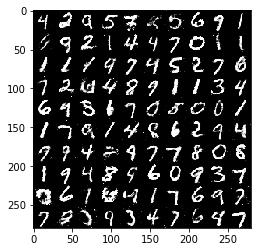

In [39]:
# generation to image
G.eval()
imshow(get_sample_image(G, n_noise), cmap='gray')

In [40]:
# Saving params.
torch.save(D.state_dict(), 'D.pkl')
torch.save(G.state_dict(), 'G.pkl')